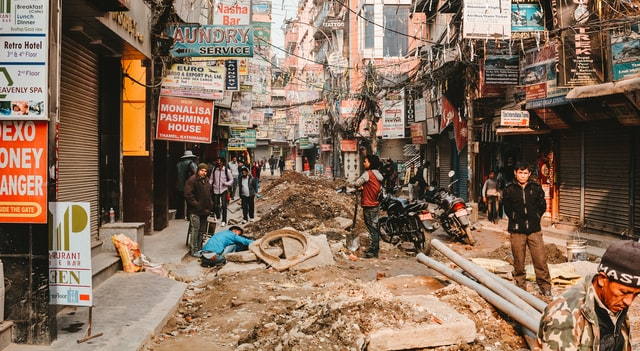

In [1]:
from IPython.display import Image
Image(filename='Images/adli-wahid-qMU6rlIhqOE-unsplash.jpg') 

# Earthquake Damage

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

# Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                    GridSearchCV)

from sklearn.preprocessing import MinMaxScaler

In [3]:
# Import metrics
from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            confusion_matrix, 
                            classification_report,
                            confusion_matrix)

In [4]:
# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC
import xgboost as xgb

# Data

In [5]:
# Load the labels
labels = pd.read_csv('data/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
# Check out the size
labels.shape

(260601, 2)

In [7]:
# Load the values
values = pd.read_csv('data/train_values.csv')
values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check out the shape
values.shape

(260601, 39)

In [9]:
# Merge labels and values into on dataframe
df = pd.merge(labels, values)
df.head()

# Why does concat never work for me?
# df = pd.concat([labels, values], axis=1)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


# Explore

In [10]:
# Total df shape
df.shape

(260601, 40)

In [11]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [12]:
# Again we see there aren't any missing values
df.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

In [13]:
# Continuous features stats
df.describe()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.238272,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,0.611814,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,3.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


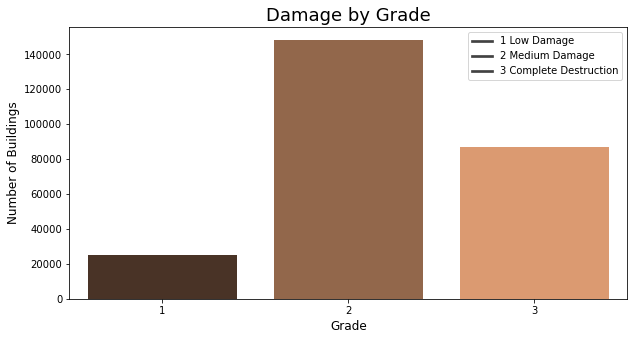

In [14]:
# Look at the damage_grades - looks pretty unbalanced
damange_count = df['damage_grade'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=damange_count.index, y=damange_count.values, palette='copper')
plt.title('Damage by Grade', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.legend(labels=["1 Low Damage","2 Medium Damage","3 Complete Destruction"])
plt.show()

* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

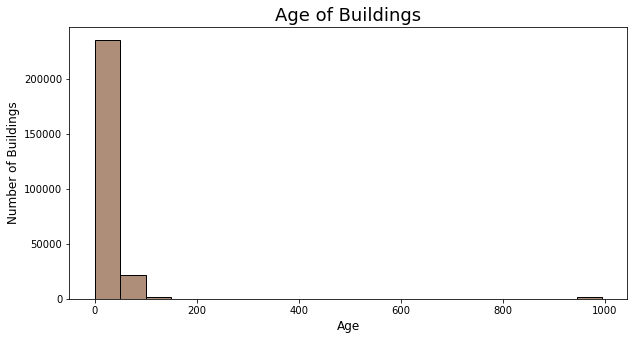

In [15]:
# Age of buildings is going to be an issue.
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", bins=20, color='#93684b')
plt.title('Age of Buildings', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

In [16]:
# Seems like the mean is well below the oldest buildings
df.age.mean()

26.535028645323695

In [17]:
# Looks like they just put a random age on old buildings
df.age.max()

995

In [18]:
# Standard deviation of age
df.age.std()

73.56593652273533

In [19]:
# Three standard deviations still makes for an old building
df.age.mean() + df.age.std()*3

247.23283821352967

In [20]:
# Look at how many building are in this group
sum(i > (df.age.mean() + df.age.std()*3) for i in df.age)

1390

In [21]:
df.loc[df['age'] > (df.age.mean() + df.age.std()*3)]

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
386,435557,2,14,1120,3789,3,995,12,5,t,...,1,0,0,0,0,0,0,0,0,0
716,597626,1,26,39,1851,2,995,27,6,t,...,0,0,0,0,0,0,0,0,0,0
1235,7560,3,26,1132,9472,2,995,8,5,t,...,0,0,0,0,0,0,0,0,0,0
1398,797271,1,26,39,1851,2,995,14,6,t,...,0,0,0,0,0,0,0,0,0,0
1635,857371,3,24,628,10750,2,995,10,5,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259758,160373,2,27,390,11020,3,995,6,8,n,...,0,0,0,0,0,0,0,0,0,0
259893,9269,2,24,628,11511,2,995,8,5,n,...,0,0,0,0,0,0,0,0,0,0
260093,34321,3,17,1393,5939,2,995,8,4,t,...,0,0,0,0,0,0,0,0,0,0
260542,156434,3,8,696,7863,2,995,8,8,t,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Give the old buildings a df
old_structures = df.loc[df['age'] > (df.age.mean() + df.age.std()*3)]

In [23]:
# Check it out
old_structures['damage_grade'].value_counts()

2    822
3    389
1    179
Name: damage_grade, dtype: int64

In [24]:
# Look closer at the percents
df2 = df.reset_index().groupby(['age', 'damage_grade']).size().to_frame('count')
df2['percentage'] = df2['count'].div(df2.groupby('age')['count'].transform('sum')).mul(100)

In [25]:
df2.head()

count  percentage
age damage_grade                   
0   1              7213   27.698629
    2             12721   48.849891
    3              6107   23.451480
5   1              5590   16.589014
    2             19030   56.473870

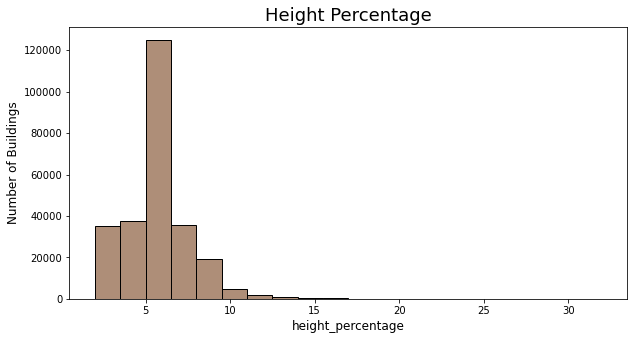

In [26]:
# Age of buildings is going to be an issue.
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="height_percentage", bins=20, color='#93684b')
plt.title('Height Percentage', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('height_percentage', fontsize=12)
plt.show()

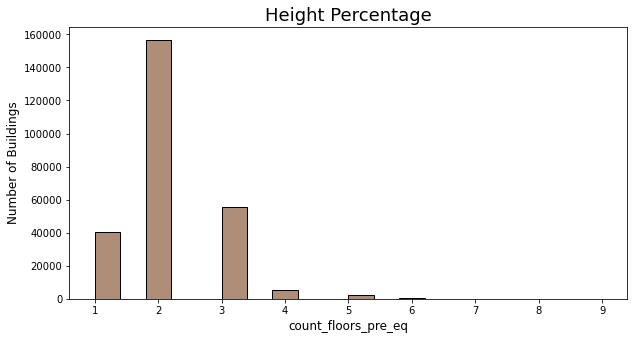

In [27]:
# Floor count.
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="count_floors_pre_eq", bins=20, color='#93684b')
plt.title('Height Percentage', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('count_floors_pre_eq', fontsize=12)
plt.show()

In [28]:
# Do the same for floor count
df.count_floors_pre_eq.value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [29]:
# Check out the percents
df3 = df.reset_index().groupby(['count_floors_pre_eq', 'damage_grade']).size().to_frame('count')
df3['percentage'] = df3['count'].div(df3.groupby('count_floors_pre_eq')['count'].transform('sum')).mul(100)

In [30]:
df3.head()

count  percentage
count_floors_pre_eq damage_grade                   
1                   1              8969   22.177988
                    2             20798   51.428006
                    3             10674   26.394006
2                   1             12593    8.040326
                    2             93968   59.996297

# Colorful and Interesting KDE Graphs

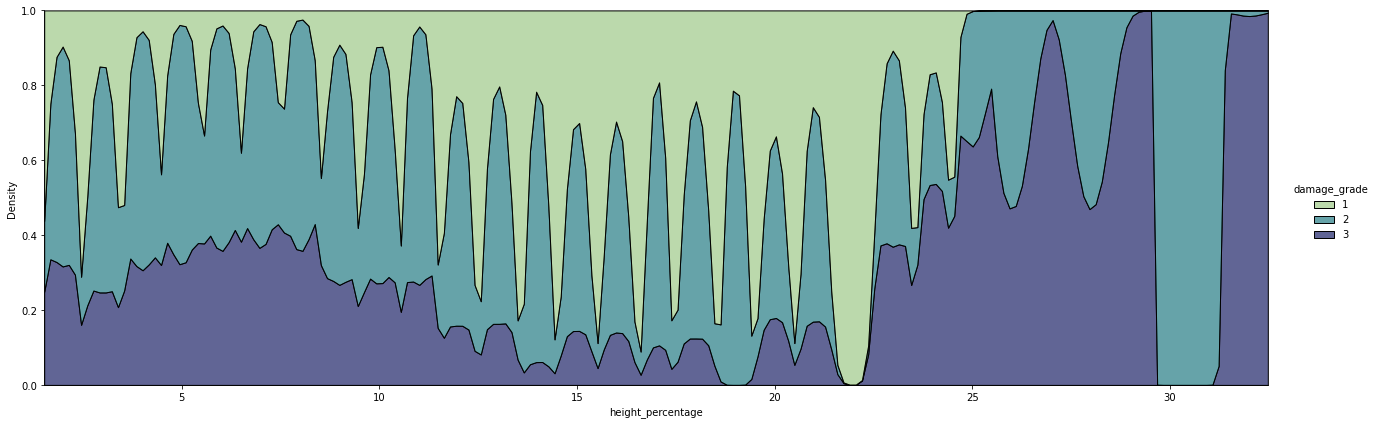

In [31]:
# Plot the distribution of height and damage
sns.displot(
    data=df,
    x="height_percentage", hue="damage_grade",
    kind="kde", height=6, aspect=3,
    multiple="fill", clip=(0, None),
    palette="crest",
)

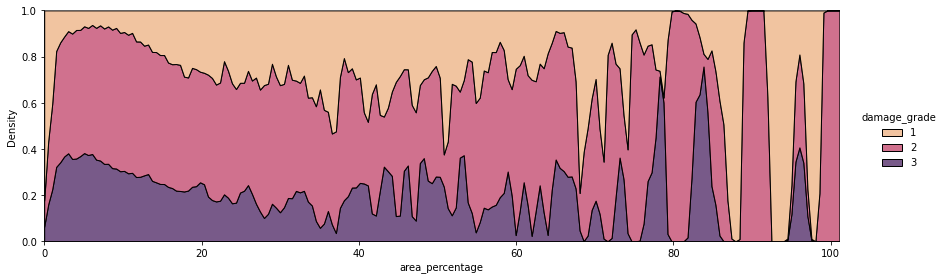

In [32]:
# Plot the distribution of area and damage
sns.displot(
    data=df,
    x="area_percentage", hue="damage_grade",
    kind="kde", height=4, aspect=3,
    multiple="fill", clip=(0, None),
    palette="flare",
)

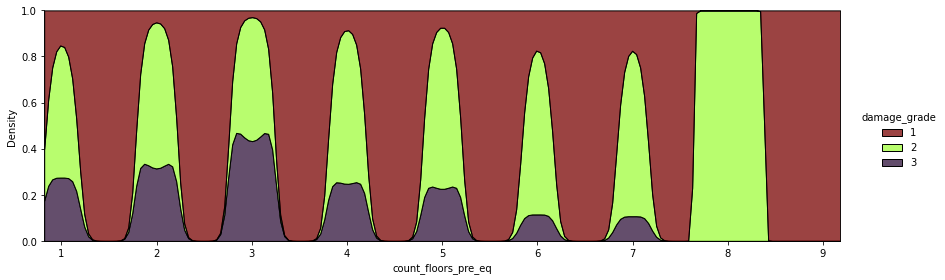

In [33]:
# Plot the distribution of floors and damage
sns.displot(
    data=df,
    x="count_floors_pre_eq", hue="damage_grade",
    kind="kde", height=4, aspect=3,
    multiple="fill", clip=(0, None),
    palette="turbo_r",
)

While these are fun and colorful, I don't think they add much value.

# Cleaning

In [34]:
# Not really sure what to do...

In [35]:
# Should I get rid of outliers? Certainly the test set has outliers.

In [36]:
# Should I combine some of the categorical data? Though they will all be present in the test.

Best Practices - split out a separate test set, tune hyperparameters, or implement cross-validation

# Imbalanced Data - Resampling

In [37]:
# Current data balance
df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [38]:
# Import resample 
from sklearn.utils import resample

In [39]:
# Create a dataset that is balanced - start with first two sets.

# Separate majority and minority classes
df_majority = df[df.damage_grade == 2] # 148259
df_minority = df[df.damage_grade == 1] # 25124
df_middle = df[df.damage_grade == 3] # 87218
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, 
                                   n_samples=len(df[df.damage_grade == 3]), random_state=123)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_middle])
 
# Display new class counts
df_downsampled.damage_grade.value_counts()

3    87218
2    87218
Name: damage_grade, dtype: int64

In [40]:
# Again... with the third class
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, 
                                   n_samples=len(df[df.damage_grade == 3]), random_state=123)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_downsampled])
 
# Display new class counts
df_balanced.damage_grade.value_counts()

3    87218
2    87218
1    87218
Name: damage_grade, dtype: int64

In [41]:
# Ended up with more rows, though probably less diverse.
df_balanced.shape

(261654, 40)

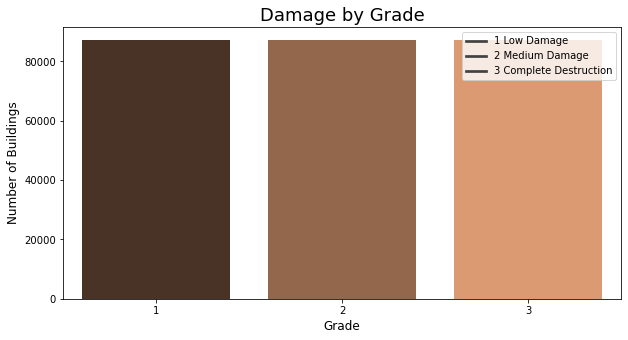

In [42]:
# View of the balanced dataset
damange_count = df_balanced['damage_grade'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=damange_count.index, y=damange_count.values, palette='copper')
plt.title('Damage by Grade', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.legend(labels=["1 Low Damage","2 Medium Damage","3 Complete Destruction"])
plt.show()

# Resampled - Balanced Data Models

In [43]:
y = df_balanced.damage_grade
y.head()

207308    1
162818    1
184023    1
224230    1
159199    1
Name: damage_grade, dtype: int64

In [44]:
X = df_balanced.select_dtypes(exclude=['object'])
X = X.drop('damage_grade', axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [46]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Forest Model - balanced
forest_clf = RandomForestClassifier(random_state=123)
forest_model = forest_clf.fit(X_train, y_train)

forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test)
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Validation accuracy: {:.4}%".format(forest_val_accuracy * 100))
print("Forest F1 Score: {:.4}%".format(f1_score(y_test, forest_val_preds, average='micro') * 100))

Forest Training Accuracy: 100.0%
Forest Validation accuracy: 78.38%
Forest F1 Score: 78.38%


In [49]:
# This model must have over-trained, because it didn't do as well as the unbalanced data set.
# Forest Training Accuracy: 100.0%
# Forest Validation accuracy: 78.38%
# Forest F1 Score: 78.38%

In [50]:
#KNN Model - balanced (takes a long time to run!)
"""
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))
print("KNN F1 Score: {:.4}%".format(f1_score(y_test, knn_val_preds, average='micro') * 100))
"""

'\nknn_clf = KNeighborsClassifier(n_neighbors=3)\nknn_clf.fit(X_train, y_train)\n\nknn_training_preds = knn_clf.predict(X_train)\nknn_training_accuracy = accuracy_score(y_train, knn_training_preds)\n\nknn_val_preds = knn_clf.predict(X_test)\nknn_val_accuracy = accuracy_score(y_test, knn_val_preds)\n\nprint("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))\nprint("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))\nprint("KNN F1 Score: {:.4}%".format(f1_score(y_test, knn_val_preds, average=\'micro\') * 100))\n'

In [51]:
# This takes a long time to run!
# KNN Training Accuracy: 83.46%
# KNN Validation accuracy: 69.61%
# KNN F1 Score: 69.61%

In [52]:
# Log model - balanced
log_clf = LogisticRegression(random_state=123, solver= 'newton-cg', max_iter=90)
log_model = log_clf.fit(X_train, y_train)

log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test)
log_val_accuracy = accuracy_score(y_test, log_val_preds)

print("Log Training Accuracy: {:.4}%".format(log_training_accuracy * 100))
print("Log Validation Accuracy: {:.4}%".format(log_val_accuracy * 100))
print("Log F1 Score: {:.4}%".format(f1_score(y_test, log_val_preds, average='micro') * 100))

Log Training Accuracy: 55.08%
Log Validation Accuracy: 55.16%
Log F1 Score: 55.16%


In [53]:
# Log Training Accuracy: 55.08%
# Log Validation Accuracy: 55.16%
# Log F1 Score: 55.16%

# One Hot Encoding

In [54]:
# Check out all the columns that are categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [55]:
# Put them into one dataframe
df_cat = df.select_dtypes(['object'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   land_surface_condition  260601 non-null  object
 1   foundation_type         260601 non-null  object
 2   roof_type               260601 non-null  object
 3   ground_floor_type       260601 non-null  object
 4   other_floor_type        260601 non-null  object
 5   position                260601 non-null  object
 6   plan_configuration      260601 non-null  object
 7   legal_ownership_status  260601 non-null  object
dtypes: object(8)
memory usage: 17.9+ MB


In [56]:
# Look at just the column names
cat_col = df_cat.columns
cat_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [57]:
# Create a list of these columns (or I suppose I could just have copied them into a list)
cat_col_list = cat_col.tolist()
cat_col_list 

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [58]:
# One-hot encoding objects is going to add 30 more columns (with drop_first = True)
total = 0
for obj in cat_col_list:
    print(df[obj].value_counts())
    num = df[obj].value_counts().count()
    total += num

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64


In [59]:
# Number of columns to be added
total - len(cat_col_list)

30

In [60]:
#  Current Shape
df.shape

(260601, 40)

In [61]:
# Convert all cat columns
df_all = pd.get_dummies(df, columns = cat_col_list, drop_first=True)

In [62]:
# Where did the other columns go?
df_all.shape

(260601, 62)

In [63]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 62 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   damage_grade                            260601 non-null  int64
 2   geo_level_1_id                          260601 non-null  int64
 3   geo_level_2_id                          260601 non-null  int64
 4   geo_level_3_id                          260601 non-null  int64
 5   count_floors_pre_eq                     260601 non-null  int64
 6   age                                     260601 non-null  int64
 7   area_percentage                         260601 non-null  int64
 8   height_percentage                       260601 non-null  int64
 9   has_superstructure_adobe_mud            260601 non-null  int64
 10  has_superstructure_mud_mortar_stone     260601 non-null  int64
 11  

# Train/Test

Since there was no difference in score using the balanced data nor with all of the categorical, I'm going to just leave it out.

In [64]:
df_all.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,3,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,2,8,900,2812,2,10,8,7,0,...,0,0,0,0,0,0,0,0,1,0
2,94947,3,21,363,8973,2,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3,590882,2,22,418,10694,2,10,6,5,0,...,0,0,0,0,0,0,0,0,1,0
4,201944,3,11,131,1488,3,30,8,9,1,...,0,0,0,0,0,0,0,0,1,0


In [65]:
# Set my target
y = df.damage_grade
y.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [66]:
# Set my labels
X = df.select_dtypes(exclude=['object'])
X = X.drop('damage_grade', axis = 1)
# X = df_all.drop('damage_grade', axis = 1) # Using all the data, including categorical
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   has_superstructure_adobe_mud            260601 non-null  int64
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64
 10  has_superstructure_stone_flag           260601 non-null  int64
 11  

In [67]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Scale the Data

In [68]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [69]:
# Standard Scaler - got the same results as with the Min/Max Scaler
"""
std_scaler = MinMaxScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
"""

'\nstd_scaler = MinMaxScaler()\nX_train = std_scaler.fit_transform(X_train)\nX_test = std_scaler.transform(X_test)\n'

# More Models

In [71]:
#KNN Model - takes too long to run
"""
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))
print("KNN F1 Score: {:.4}%".format(f1_score(y_test, knn_val_preds, average='micro') * 100))
"""

'\nknn_clf = KNeighborsClassifier(n_neighbors=3)\nknn_clf.fit(X_train, y_train)\n\nknn_training_preds = knn_clf.predict(X_train)\nknn_training_accuracy = accuracy_score(y_train, knn_training_preds)\n\nknn_val_preds = knn_clf.predict(X_test)\nknn_val_accuracy = accuracy_score(y_test, knn_val_preds)\n\nprint("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))\nprint("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))\nprint("KNN F1 Score: {:.4}%".format(f1_score(y_test, knn_val_preds, average=\'micro\') * 100))\n'

In [72]:
# Forest Model
forest_clf = RandomForestClassifier(random_state=123)
forest_model = forest_clf.fit(X_train, y_train)

forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test)
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Validation accuracy: {:.4}%".format(forest_val_accuracy * 100))
print("Forest F1 Score: {:.4}%".format(f1_score(y_test, forest_val_preds, average='micro') * 100))

Forest Training Accuracy: 100.0%
Forest Validation accuracy: 71.57%
Forest F1 Score: 71.57%


In [73]:
# Log model
log_clf = LogisticRegression(random_state=123, solver= 'newton-cg', max_iter=90)
log_model = log_clf.fit(X_train, y_train)

log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test)
log_val_accuracy = accuracy_score(y_test, log_val_preds)

print("Log Training Accuracy: {:.4}%".format(log_training_accuracy * 100))
print("Log Validation Accuracy: {:.4}%".format(log_val_accuracy * 100))
print("Log F1 Score: {:.4}%".format(f1_score(y_test, log_val_preds, average='micro') * 100))

Log Training Accuracy: 57.84%
Log Validation Accuracy: 57.74%
Log F1 Score: 57.74%


In [ ]:
# SVR model - couldn't get it to work
"""
svr_clf = SVR()
svr_model = svr_clf.fit(X_train, y_train)

svr_training_preds = svr_clf.predict(X_train)
svr_training_accuracy = accuracy_score(y_train, svr_training_preds)

svr_val_preds = svr_clf.predict(X_test)
svr_val_accuracy = accuracy_score(y_test, svr_val_preds)

print("SVR Training Accuracy: {:.4}%".format(svr_training_accuracy * 100))
print("SVR Validation Accuracy: {:.4}%".format(svr_val_accuracy * 100))
print("SVR F1 Score: {:.4}%".format(f1_score(y_test, svr_val_preds, average='micro') * 100))

In [ ]:
# SVR model
svc_clf = SVC()
svc_model = svc_clf.fit(X_train, y_train)

svc_training_preds = svc_clf.predict(X_train)
svc_training_accuracy = accuracy_score(y_train, svc_training_preds)

svc_val_preds = svc_clf.predict(X_test)
svc_val_accuracy = accuracy_score(y_test, svc_val_preds)

print("SVC Training Accuracy: {:.4}%".format(svc_training_accuracy * 100))
print("SVC Validation Accuracy: {:.4}%".format(svc_val_accuracy * 100))
print("SVC F1 Score: {:.4}%".format(f1_score(y_test, svc_val_preds, average='micro') * 100))

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
# XGB classifier
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

xgb_training_preds = xgb_clf.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test)
xgb_val_accuracy = accuracy_score(y_test, xgb_val_preds)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

XGB Training Accuracy: 74.7%
XGB Validation accuracy: 72.25%


# Feature Importance

In [76]:
# A look at which features are important from the forest model
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(3,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


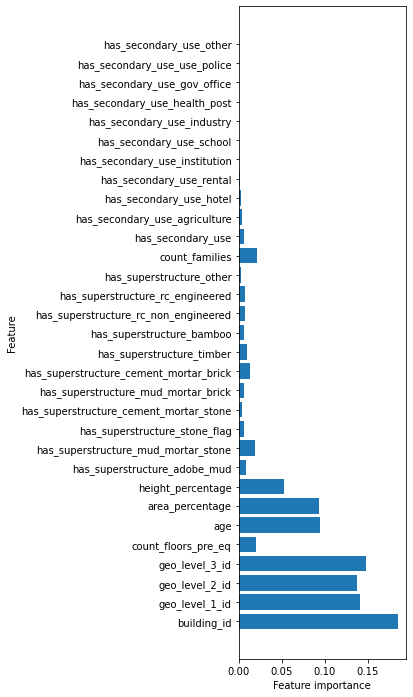

In [77]:
# xgb feature importance
plot_feature_importances(forest_clf)

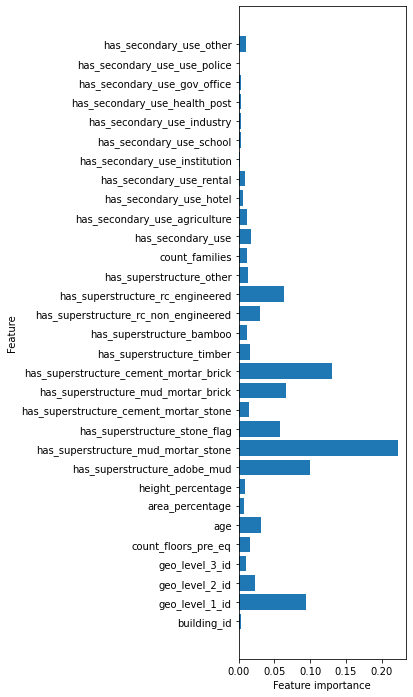

In [78]:
# xgb feature importance
plot_feature_importances(xgb_clf)

# GridSearch

In [79]:
# XGBoost GridSearch parameters grid
param_grid_1 = {
    "learning_rate": [0.1],
    'max_depth': [1, 5, 10],
    'min_child_weight': [0, 1],
    'subsample': [0, .1, .5],
    'n_estimators': [0, 1, 10],
}

In [80]:
# GridSearch Classifier with XGB
grid_clf = GridSearchCV(xgb_clf, param_grid_1, scoring='accuracy', n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds_xgb = grid_clf.predict(X_train)
training_accuracy_xgb = accuracy_score(y_train, training_preds_xgb)
val_preds_xgb = grid_clf.predict(X_test)
val_accuracy_xgb = accuracy_score(y_test, val_preds_xgb)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_xgb * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy_xgb * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 10
min_child_weight: 0
n_estimators: 10
subsample: 0.5

Training Accuracy: 71.4%
Validation accuracy: 69.94%


In [81]:
# Forst Model with GridSearch parameters
param_grid_2 = {
    'max_depth': [5, 10, 50, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 5],
    'n_estimators': [10, 25, 100],
}

In [ ]:
# GridSearch Classifier
# This time I'm going to try criterion='entropy'
forest_clf = RandomForestClassifier()
grid_clf = GridSearchCV(forest_clf, param_grid_2, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds_forest = grid_clf.predict(X_train)
training_accuracy_forest = accuracy_score(y_train, training_preds_forest)

val_preds_forest = grid_clf.predict(X_test)
val_accuracy_forest = accuracy_score(y_test, val_preds_forest)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_forest * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy_forest * 100))

# Conclusion

My base model where I excluded all of the non-linear features with very little cleaning other than the Min/Max Scaler worked best with the Random Forest and returned an accuracy score of 72%. I couldn't get all of the models to run, probably because of the imbalanced dataset with I need to attempt to deal with, along with adding in the non-continuous features.

Then I created a balanced dataset where all three of the target variables of damage_grade had the same number of rows using up-sampling and down-sampling. Unfortunately, this just gave me a better training score but lowered my accuracy for the test group - probably resulting in over-fitting. The score for the forest model returned an f1_score of 78% but with the actual test group the score was 68%.

I tried a third time with XGB and the Standard Scalar (even though there didn't seem to be any difference between the Min/Max Scalar and the Standard Scalar on the Random Forest Model). This time the model did slightly better for the submission but still not great - 73%, which was actually better than my own testing score.

Finally I tried using get_dummies to include all of the categorical columns. Though not only did this add a lot of columns it didn't improve the score - so in the end I left it out.

# Future Work

I still would like to know more about dealing with the unbalanced data set as well as all the categorical columns. Plus, I need to do some hypertuning of parameters and take a closer look at the feature importance. Perhaps I can build a faster and lighter model based on only a handful of columns.

I'm curious about what other factors could be taken into account when looking at earthquake disasters (such as number of earthquakes per year, average Richter score, and how this specific earthquake came about - tectonic plate movement, volcanic eruption, or tsunami). And can more work be done looking at historic buildings and placement in relation to the center of the earthquake.


# Submissions

In [ ]:
# Imput test data
test_set = pd.read_csv('data/test_values.csv')
test_set.head()

Cleaning?

In [ ]:
# Drop the non-linear columns
test = test_set.select_dtypes(exclude=['object'])

In [ ]:
# Scale the test set - Min/Max
test = mm_scaler.transform(test)

In [ ]:
# Scale the test set - Standard
test = std_scaler.transform(test)

In [ ]:
# Predict target values on test set
forest_test_preds = forest_clf.predict(test)

In [ ]:
# Change array to a dataframe
forest_target = pd.DataFrame(forest_test_preds)
forest_target.head()

In [ ]:
# Put building_id back in dataframe
forest_output = pd.merge(test_set['building_id'], forest_target, how = 'left', 
                         left_index = True, right_index = True)

In [ ]:
# Check it out
forest_output.head()

In [ ]:
# Put in the column name
forest_output = forest_output.rename(columns = {0:"damage_grade"}) 
forest_output.head()

In [ ]:
# Change it to a CSV file
forest_output.to_csv('whipple_earthquake_forest_submission1.csv', index=False)

In [ ]:
# Change my second attempt to CSV
forest_output.to_csv('whipple_earthquake_forest_submission2.csv', index=False)

In [ ]:
# Checking the first attempt with unbalanced data and random forest model
submission_attempt_1 = pd.read_csv('./whipple_earthquake_forest_submission1.csv')
submission_attempt_1.head()

My first submission score.

![alt text](Images/earthquake_forest_submission_1.png "Submission Score 1")

In [ ]:
# Checking out my second submission which scored worst with the balanced data!
submission_attempt_2 = pd.read_csv('./whipple_earthquake_forest_submission2.csv')
submission_attempt_2.head()

# Again with XGB

In [ ]:
# Predict target values on test set
xgb_test_preds = xgb_clf.predict(test)

In [ ]:
# Change array to a dataframe
xgb_target = pd.DataFrame(xgb_test_preds)
xgb_target.head()

In [ ]:
# Put building_id back in dataframe
xgb_output = pd.merge(test_set['building_id'], xgb_target, how = 'left', 
                         left_index = True, right_index = True)

In [ ]:
# Put in the column name
xgb_output = xgb_output.rename(columns = {0:"damage_grade"}) 
xgb_output.head()

In [ ]:
# To a CSV file
xgb_output.to_csv('whipple_earthquake_xgb_submission3.csv', index=False)

In [ ]:
# Check it out here
submission_attempt_3 = pd.read_csv('./Submission_Files/whipple_earthquake_xgb_submission3.csv')
submission_attempt_3.head()

My final submission score. Considering the leader of the board had only a score of 0.7560 I feel like I was pretty close!

![alt text](Images/earthquake_xgb_submission_3.png "Submission Score 3")